In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

Load a dataset.

In [2]:
import pandas as pd

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
names = [
    'age', 'workclass', 'fnlwgt', 'education',
    'education-num', 'marital-status', 'occupation',
    'relationship', 'race', 'gender', 'capital-gain',
    'capital-loss', 'hours-per-week', 'native-country',
    'salary'
]
dtypes = {
    'workclass': 'category',
    'education': 'category',
    'marital-status': 'category',
    'occupation': 'category',
    'relationship': 'category',
    'race': 'category',
    'gender': 'category',
    'native-country': 'category'
}

X = pd.read_csv(url, names=names, header=None, dtype=dtypes)
y = X.pop('salary').map({' <=50K': 0, ' >50K': 1})

X.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


Split train from test.

In [3]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, shuffle=True, random_state=42)

Train a model.

In [4]:
import lightgbm as lgb

model = lgb.LGBMClassifier(random_state=42).fit(X_train, y_train)

Make a prediction on the test set.

In [5]:
y_pred = model.predict_proba(X_test)[:, 1]

Fit the explainer.

In [6]:
import ethik

explainer = ethik.Explainer()
explainer = explainer.fit(X_test)

/home/max/projects/ethik/ethik/explainer.py:149: RuntimeWarning: overflow encountered in exp
  sample_weights = np.exp(λ * x)


## Model predictions

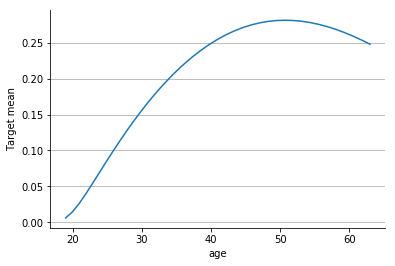

In [19]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax = explainer.plot_predictions(
    X=X_test,
    y_pred=y_pred,
    columns='age'
)

plt.savefig('figures/age_predictions.svg')

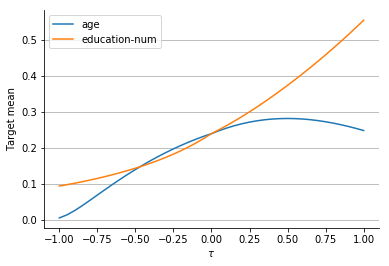

In [20]:
fig, ax = plt.subplots()

ax = explainer.plot_predictions(
    X=X_test,
    y_pred=y_pred,
    columns=['age', 'education-num']
)

plt.savefig('figures/age_education_predictions.svg')

## Model reliability

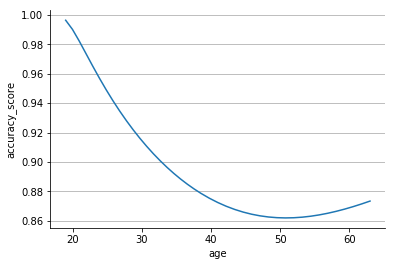

In [21]:
from sklearn import metrics

fig, ax = plt.subplots()
    
ax = explainer.plot_metric(
    X=X_test,
    y=y_test,
    y_pred=y_pred > 0.5,
    metric=metrics.accuracy_score,
    columns='age'
)

plt.savefig('figures/age_accuracy.svg')

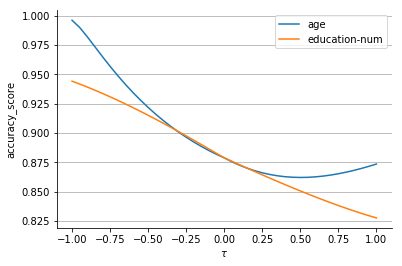

In [22]:
fig, ax = plt.subplots()

ax = explainer.plot_metric(
    X=X_test,
    y=y_test,
    y_pred=y_pred > 0.5,
    metric=metrics.accuracy_score,
    columns=['age', 'education-num']
)

plt.savefig('figures/age_education_accuracy.svg')

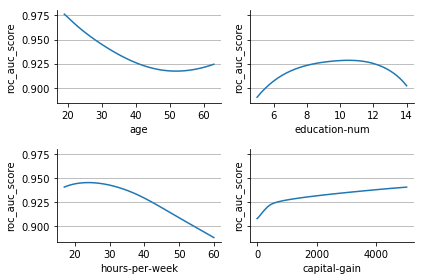

In [23]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, sharey=True)

cols = ['age', 'education-num', 'hours-per-week', 'capital-gain']

for i, col in enumerate(cols):
    
    explainer.plot_metric(
        X=X_test,
        y=y_test,
        y_pred=y_pred,
        metric=metrics.roc_auc_score,
        columns=col,
        ax=axes[i // 2, i % 2]
    )
    
fig.tight_layout()

In [9]:
expl.initjs()

<IPython.core.display.Javascript object>

In [14]:
expl.plot_fuzz()

<IPython.core.display.Javascript object>

In [17]:
from IPython import display

display.display(display.Javascript("require.config({paths: {d3: 'https://d3js.org/d3.v5.min'}});"))
display.display(display.Javascript(filename="ethik/resources/circles.js"))
display.display(display.HTML(filename="ethik/resources/circles.css.html"))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [22]:
import json

def draw_circles(data, width=600, height=400):
    display.display(display.Javascript("""
        (function(element){
            require(['circles'], function(circles) {
                circles(element.get(0), %s, %d, %d);
            });
        })(element);
    """ % (json.dumps(data), width, height)))

In [23]:
draw_circles([10, 60, 40, 5, 30, 10], width=500, height=200)

<IPython.core.display.Javascript object>